# Welcome to the Beginner Python Workshop 

**Topic: Scripting and plotting with a dataset**

This notebook will give you a basic introduction to the Python world. Some of the topics mentioned below is also covered in the [tutorials and tutorial videos](https://github.com/GuckLab/Python-Workshops/tree/main/tutorials)

Eoghan O'Connell, Guck Division, MPL, 2021

In [1]:
# notebook metadata you can ignore!
info = {"workshop": "05",
        "topic": ["scripting", "plotting", "pandas",
                  "matplotlib", "csv", "iris", "data"],
        "version" : "0.0.1"}

### How to use this notebook

- Click on a cell (each box is called a cell). Hit "shift+enter", this will run the cell!
- You can run the cells in any order!
- The output of runnable code is printed below the cell.
- Check out this [Jupyter Notebook Tutorial video](https://www.youtube.com/watch?v=HW29067qVWk).

See the help tab above for more information!


# What is in this Workshop?
In this notebook we cover:
- How to open a `.csv` file (excel/csv/tsv spreadsheet) with pandas
- How to work with pandas dataframes
   - Looking at columns, rows, slicing, indexing, concat, changing cells
   - How to convert between pandas dataframes and numpy arrays
- How to plot with pandas and matplotlib
   - Simple figures
   - Subfigures, 3D plots
- Curve fitting 

Check out the tutorial video series by Corey Schafer on pandas [here](https://www.youtube.com/watch?v=ZyhVh-qRZPA&list=PL-osiE80TeTsWmV9i9c58mdDCSskIFdDS).

In [2]:
# import necessary modules
%matplotlib nbagg
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Opening a `.csv` file (excel) 

We will look at the iris dataset. This includes data on three species of the iris flower genus. For each of the species, the Petal width and length, and the Sepal width and length.

In [8]:
df = pd.read_csv(r"../data/iris.csv")

In [74]:
# print out the first rows of the dataframe

df.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
# you can see the documentation for more parameter options:
#  https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

# For example, we can only use some columns to create the DataFrame

df = pd.read_csv(r"../data/iris.csv", usecols=["sepallength", "petallength"])
print(df.head())

   sepallength  petallength
0          5.1          1.4
1          4.9          1.4
2          4.7          1.3
3          4.6          1.5
4          5.0          1.4


In [24]:
df = pd.read_csv(r"../data/iris.csv")

### How to work with pandas dataframes

In [39]:
# the left column are the row numbers, accessible with df.index

print(df.index)

print(df.index[0])

print(df.index[0:2])

RangeIndex(start=0, stop=150, step=1)
0
RangeIndex(start=0, stop=2, step=1)


In [40]:
# columns can be accessed with df.columns

print(df.columns)

print(df.columns[0])

print(df.columns[0:2])

Index(['sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'class'], dtype='object')
sepallength
Index(['sepallength', 'sepalwidth'], dtype='object')


In [52]:
# we can access column data with df["column title"]

print(df["sepallength"])
print("\n")
print(df["sepallength"][0])
print("\n")
print(df["sepallength"][0:2])

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepallength, Length: 150, dtype: float64


5.1


0    5.1
1    4.9
Name: sepallength, dtype: float64


In [59]:
# we can access multiple column data too by listing the column titles

print(df[["sepallength", "petallength"]])

     sepallength  petallength
0            5.1          1.4
1            4.9          1.4
2            4.7          1.3
3            4.6          1.5
4            5.0          1.4
..           ...          ...
145          6.7          5.2
146          6.3          5.0
147          6.5          5.2
148          6.2          5.4
149          5.9          5.1

[150 rows x 2 columns]


#### Dataframe methods

In [62]:
# we can easily get column values that match other column values with the df.loc method

petallength_setosa = df.loc[df["class"] == "Iris-setosa", "petallength"]

print(petallength_setosa[0:10])

# lets break that up
# df["class"]
# df["class"] == "Iris-setosa"

0    1.4
1    1.4
2    1.3
3    1.5
4    1.4
5    1.7
6    1.4
7    1.5
8    1.4
9    1.5
Name: petallength, dtype: float64


In [81]:
# we can easily get statistics of our data

df.mean(numeric_only=True)

# df.std(numeric_only=True)
# df.median(numeric_only=True)
# df.mode(numeric_only=True)

sepallength       5.843333
sepalwidth        3.054000
petallength       3.758667
petalwidth        1.198667
new column        3.463667
mean along row    3.463667
dtype: float64

In [79]:
# let's add a new column that is the mean of all other columns

df["mean along row"] = df.mean(numeric_only=True, axis=1)

df.head()

,sepallength,sepalwidth,petallength,petalwidth,class,new column,mean along row
0,5.1,3.5,1.4,0.2,Iris-setosa,2.550,2.550
1,4.9,3.0,1.4,0.2,Iris-setosa,2.375,2.375
2,4.7,3.2,1.3,0.2,Iris-setosa,2.350,2.350
3,4.6,3.1,1.5,0.2,Iris-setosa,2.350,2.350
4,5.0,3.6,1.4,0.2,Iris-setosa,2.550,2.550


In [118]:
# you can assign a new value to a specific cell with df.at

print(df.at[0, "mean along row"])

df.at[0, "mean along row"] = 42

print(df.at[0, "mean along row"])

2.55
42.0


#### Dataframes and Arrays

Sometimes we want to convert numeric data between dataframes and numpy arrays.
Neither is "better", but each has its own strengths

In [111]:
# converting numeric data

print(type(df))
print(type(df["petalwidth"]))

arr1 = np.array(df["petalwidth"])

print(type(arr1))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [112]:
# let's compare the time to compute the mean
# remember that you usually dn't have to worry about speed, only when you have very big datasets

series1 = df["petalwidth"]

print("Time taken for pandas series:")
%timeit -r 3 -n 100 series1.mean()

print("\nTime taken for numpy array:")
%timeit -r 3 -n 100 arr1.mean()

Time taken for pandas series:
167 µs ± 8.78 µs per loop (mean ± std. dev. of 3 runs, 100 loops each)

Time taken for numpy array:
16.2 µs ± 488 ns per loop (mean ± std. dev. of 3 runs, 100 loops each)


In [113]:
# numpy isn't really designed for strings! Use dataframes for strings and non-numeric data

arr2 = np.array(df["class"])
print(arr2.dtype)
print(arr2[45:55])

object
['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor']


### How to plot with pandas and matplotlib

We will plot first with pandas, and see how it uses matplotlib in the background!

#### Simple figures

<IPython.core.display.Javascript object>


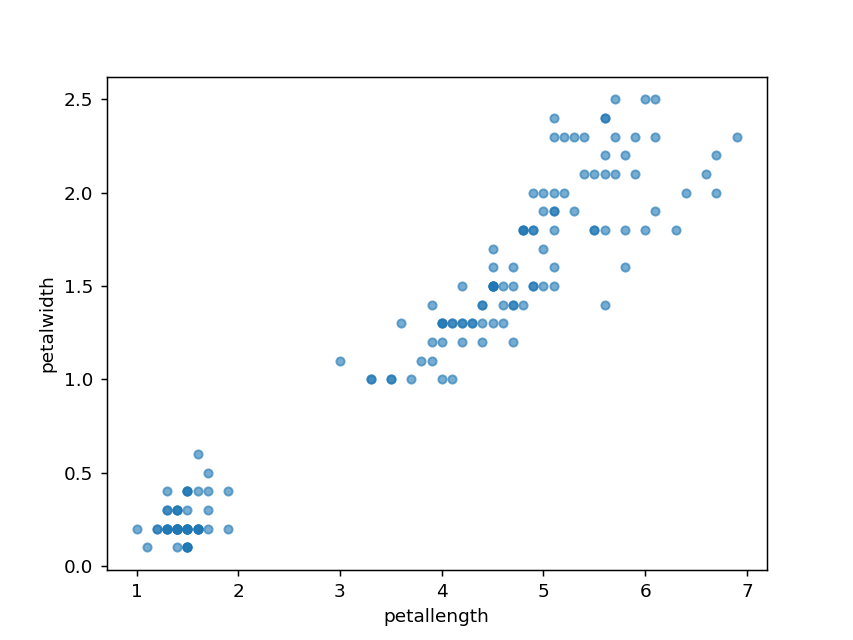

<AxesSubplot:xlabel='petallength', ylabel='petalwidth'>

In [152]:
# plotting with pandas is really easy!

df.plot.scatter(x="petallength", y="petalwidth", alpha=0.6)

<IPython.core.display.Javascript object>


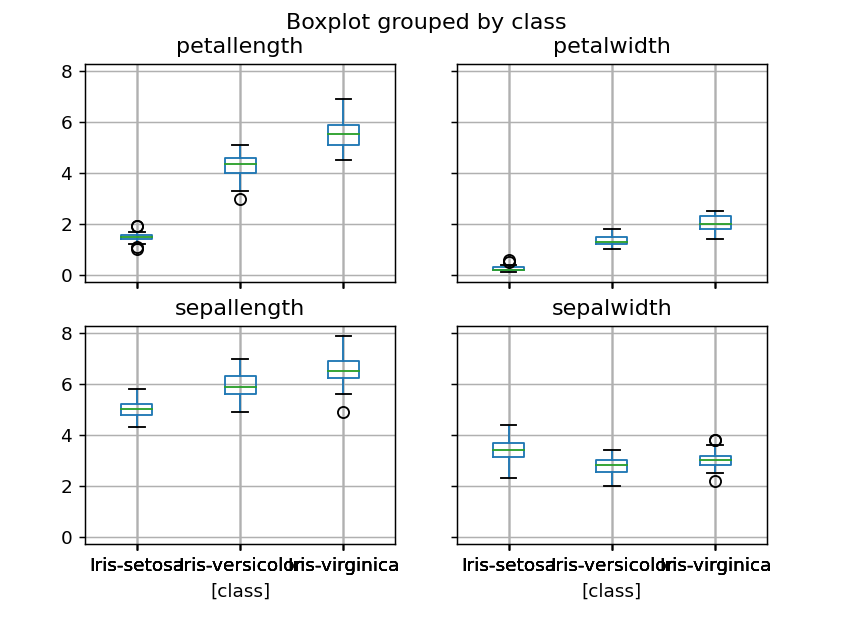

array([[<AxesSubplot:title={'center':'petallength'}, xlabel='[class]'>,
        <AxesSubplot:title={'center':'petalwidth'}, xlabel='[class]'>],
       [<AxesSubplot:title={'center':'sepallength'}, xlabel='[class]'>,
        <AxesSubplot:title={'center':'sepalwidth'}, xlabel='[class]'>]],
      dtype=object)

In [169]:
# we can look at boxplots

df.boxplot(by="class")

<IPython.core.display.Javascript object>


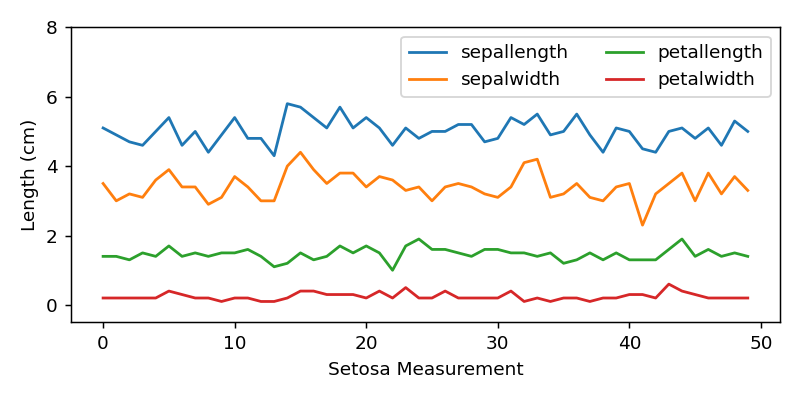

In [194]:
# we can use matplotlib to edit our figure

fig, axs = plt.subplots(figsize=(6, 3))
df[0:50].plot(ax=axs)
axs.set_xlabel("Setosa Measurement")
axs.set_ylabel("Length (cm)")

axs.set_ylim((-0.5, 8))
axs.legend(ncol=2, loc="upper right")

plt.tight_layout()
plt.show()
plt.savefig("Iris Setosa measurements.png")

#### Advanced figures and subfigures

<IPython.core.display.Javascript object>


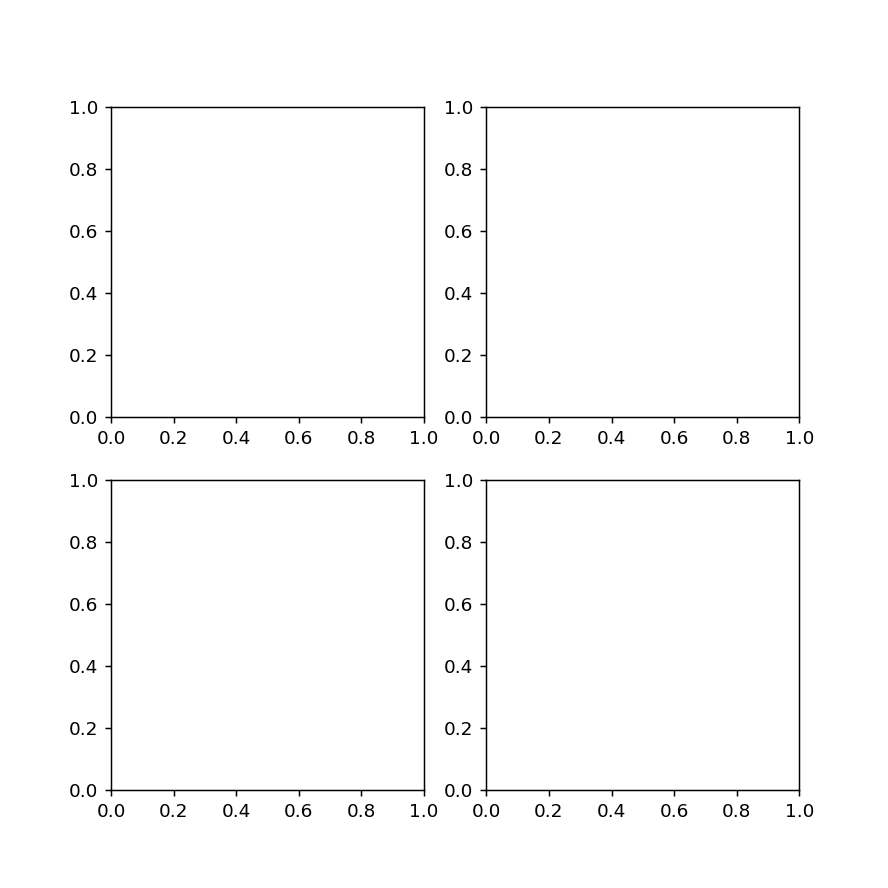

In [196]:
fig, axs = plt.subplots(2,2, figsize=(5, 5))

#### 3D plots

<IPython.core.display.Javascript object>


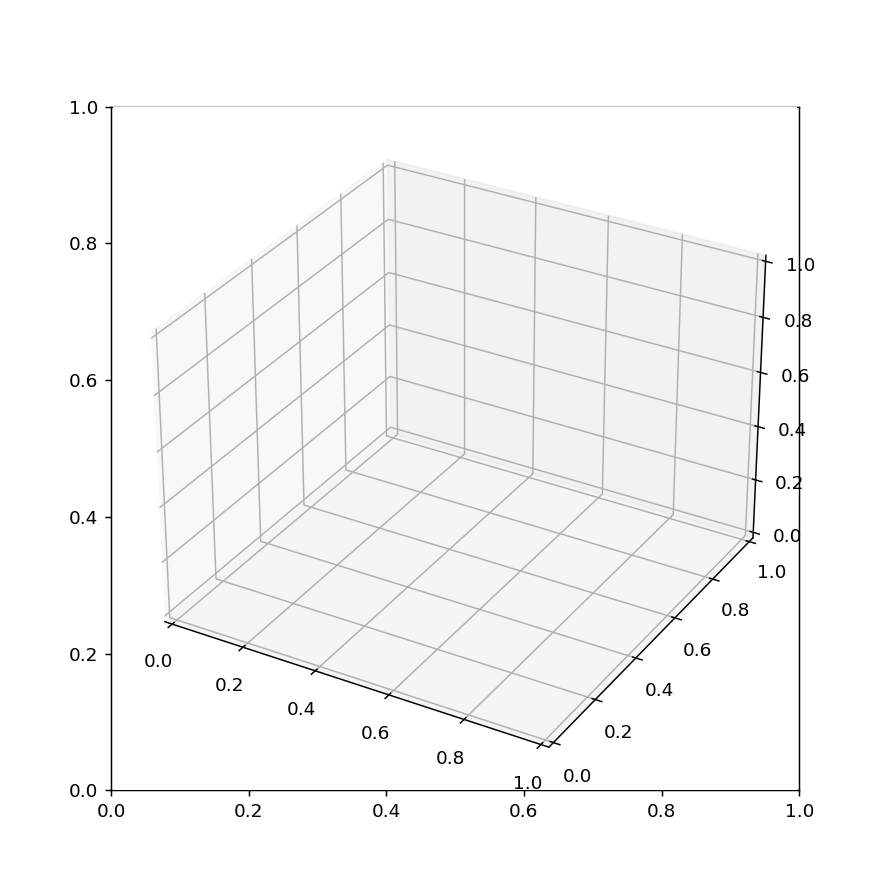

In [199]:
fig, axs = plt.subplots(figsize=(5, 5))
ax3 = fig.add_subplot(projection='3d')


### Curve fitting

We can do some curve fitting with pandas, numpy, scipy or other packages